In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./RNA_seq.csv")
dataT=np.array(data)
data=dataT.T
co=data[0]
data1=np.delete(data,0,axis=0)
data=data1
datadf= pd.DataFrame(data=data[0:,0:],columns=co)
datadf.head()
data=datadf
data= data.replace("NOTLC",value=0)
data= data.replace("LC",value=1)
X=data.drop(['Group'],axis=1)
y=data['Group']

In [3]:
data

,Group,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,1,1745,1,1923,1221,1018,2175,1943,1830,1653,...,0,1,88,0,0,0,262,0,12,56
1,1,3715,0,2468,249,395,150,500,2736,8506,...,0,0,3,0,0,0,55,0,1,2
2,1,1578,0,1194,693,664,1205,5244,1215,19392,...,0,0,11,0,0,2,260,0,12,16
3,1,7338,0,1872,596,1047,1656,6848,8263,9263,...,0,0,36,0,0,0,338,0,0,5
4,1,5495,5,4393,1334,954,737,6599,2430,33698,...,0,0,15,0,0,0,234,0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1,2078,5,1004,368,117,763,4473,1755,852,...,0,0,5,0,0,0,61,0,5,13
1094,1,1441,4,1877,882,424,278,2053,1894,5712,...,0,0,32,0,0,0,279,0,2,21
1095,1,1671,1,1100,649,226,5589,4520,2468,1541,...,0,0,26,0,0,0,203,0,7,23
1096,1,7829,0,2394,1007,1294,1175,2077,3673,2219,...,0,0,92,0,1,0,239,0,1,25


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (878, 60660)
Test shape: (220, 60660)


In [5]:
column=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_pre=sc.fit_transform(X)
X_pre=pd.DataFrame(data=X_pre,columns=column)

In [6]:
def crosspredict(estimator,Xtrain,ytrain,cv):
    print("cross-validate across the entire data set")
    y_pred_cross=cross_val_predict(estimator,Xtrain,ytrain,cv=cv)
    confusion_cross=confusion_matrix(ytrain,y_pred_cross)
    a=accuracy_score(ytrain,y_pred_cross)
    p=precision_score(ytrain, y_pred_cross)
    r=recall_score(ytrain, y_pred_cross)
    f1=f1_score(ytrain, y_pred_cross)
    wf1=f1_score(ytrain, y_pred_cross, average='weighted')
    print('the confusion_matrix of the model is : \n',confusion_cross)
    print('the accuracy of the model is : ',a)
    print("the precision score of the model is : ", p)
    print("the recall score of the model is :", r)
    print('the f1_score of the model  is :',f1)
    print('the weighted_f1 of the model is :',wf1)
    print('the classification_report is :\n',classification_report(ytrain, y_pred_cross,digits=4))
    return a,p,r,f1,wf1,y_pred_cross,ytrain

In [7]:
def crosspredict_proba(estimator,Xtrain,ytrain,cv):
    print("cross-validate across the entire data set")
    y_pred_proba=cross_val_predict(estimator,Xtrain,ytrain,cv=cv,method='predict_proba')
    return y_pred_proba 

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
yuanc1=SVC(kernel="poly",degree=3,coef0=1,probability=True)
yuanc2=KNeighborsClassifier(n_neighbors=5)
yuanc3=LogisticRegression(C=0.01)
yuanc4= GaussianNB()
yuanc6=DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=6)
yuanc7=RandomForestClassifier(max_depth=4,n_estimators=108,n_jobs=-1,random_state=90)
yuanc8=AdaBoostClassifier(learning_rate=1,n_estimators=50)
yuanc9=GradientBoostingClassifier(learning_rate=0.01,loss='exponential',n_estimators=300)
yuanc10=XGBClassifier(booster='gbtree',learning_rate=0.01,n_estimators=400)
yuanc11=lgb.LGBMClassifier(max_depth=6,n_estimators=200)

In [11]:
yuan1=SVC(probability=True)
yuan2=KNeighborsClassifier()
yuan3=LogisticRegression()
yuan4=GaussianNB()
yuan6=DecisionTreeClassifier()
yuan7=RandomForestClassifier()
yuan8=AdaBoostClassifier()
yuan9=GradientBoostingClassifier()
yuan10=XGBClassifier()
yuan11=lgb.LGBMClassifier()

In [12]:
from sklearn.base import ClassifierMixin
from sklearn.base import TransformerMixin, BaseEstimator
class MyEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, model, mask) -> None:
        super().__init__()
        self.mask = mask
        self.model = model
    
    def fit(self, X, y=None):
        self.model.fit(X[self.mask],y)
        self.classes_ = self.model.classes_
        return self

    def predict(self, X):
        return self.model.predict(X[self.mask])
    
    def predict_proba(self,X):
        return self.model.predict_proba(X[self.mask])

In [13]:
sel_mask=[
#SVC
['ENSG00000223982.3','ENSG00000002726.21','ENSG00000039068.19','ENSG00000106089.12','ENSG00000182685.7','ENSG00000154813.10','ENSG00000204305.14' ,'ENSG00000135604.10', 'ENSG00000004399.13','ENSG00000000003.15'],
#KNN
['ENSG00000223982.3', 'ENSG00000229693.2', 'ENSG00000091262.16','ENSG00000204305.14', 'ENSG00000004399.13', 'ENSG00000039068.19'],
#LR
['ENSG00000102547.19','ENSG00000135604.10','ENSG00000159352.16','ENSG00000224215.1','ENSG00000234481.2','ENSG00000252275.1','ENSG00000271555.1'],
#GNB
['ENSG00000000938.13', 'ENSG00000004399.13','ENSG00000166123.14', 'ENSG00000204305.14', 'ENSG00000211643.2','ENSG00000259884.1', 'ENSG00000279940.1'],
#DT
['ENSG00000003147.19','ENSG00000004455.17','ENSG00000006327.14','ENSG00000018510.17','ENSG00000067064.11','ENSG00000154813.10','ENSG00000204305.14','ENSG00000234425.1','ENSG00000262772.2','ENSG00000272477.1'],
#RF
['ENSG00000106089.12', 'ENSG00000204305.14', 'ENSG00000223982.3','ENSG00000229693.2'],
#Ada
['ENSG00000000005.6', 'ENSG00000002933.9','ENSG00000019144.19', 'ENSG00000070366.14','ENSG00000091262.16','ENSG00000106089.12','ENSG00000204305.14','ENSG00000233117.4'],
#gbdt
['ENSG00000000005.6','ENSG00000000971.16', 'ENSG00000001631.16','ENSG00000002587.10', 'ENSG00000004779.10','ENSG00000106089.12', 'ENSG00000144130.11', 'ENSG00000204305.14'],
#XGB
['ENSG00000008128.23','ENSG00000106089.12','ENSG00000170989.10','ENSG00000006327.14','ENSG00000018510.17','ENSG00000204305.14',],
#LGB
['ENSG00000106089.12', 'ENSG00000170989.10','ENSG00000204305.14'],
]

In [14]:
sel_seq_dt_mask=['ENSG00000003147.19','ENSG00000004455.17','ENSG00000006327.14','ENSG00000018510.17','ENSG00000067064.11','ENSG00000154813.10','ENSG00000204305.14','ENSG00000234425.1','ENSG00000262772.2','ENSG00000272477.1']
sel_seq_rf_mask=['ENSG00000106089.12', 'ENSG00000204305.14', 'ENSG00000223982.3','ENSG00000229693.2']
sel_seq_ada_mask=['ENSG00000000005.6', 'ENSG00000002933.9','ENSG00000019144.19', 'ENSG00000070366.14','ENSG00000091262.16','ENSG00000106089.12','ENSG00000204305.14','ENSG00000233117.4']
sel_seq_gb_mask=['ENSG00000000005.6','ENSG00000000971.16', 'ENSG00000001631.16','ENSG00000002587.10', 'ENSG00000004779.10','ENSG00000106089.12', 'ENSG00000144130.11', 'ENSG00000204305.14']
sel_seq_xgb_mask=['ENSG00000008128.23','ENSG00000106089.12','ENSG00000170989.10','ENSG00000006327.14','ENSG00000018510.17','ENSG00000204305.14',]
sel_seq_KN_mask=['ENSG00000223982.3', 'ENSG00000229693.2', 'ENSG00000091262.16','ENSG00000204305.14', 'ENSG00000004399.13', 'ENSG00000039068.19']
sel_seq_Lightgbm_mask=['ENSG00000106089.12', 'ENSG00000170989.10','ENSG00000204305.14']
sel_seq_SVC_mask=['ENSG00000223982.3','ENSG00000002726.21','ENSG00000039068.19','ENSG00000106089.12','ENSG00000182685.7','ENSG00000154813.10','ENSG00000204305.14' ,'ENSG00000135604.10', 'ENSG00000004399.13','ENSG00000000003.15']
sel_seq_GNB_mask=['ENSG00000000938.13', 'ENSG00000004399.13','ENSG00000166123.14', 'ENSG00000204305.14', 'ENSG00000211643.2','ENSG00000259884.1', 'ENSG00000279940.1']
sel_seq_lr_mask=['ENSG00000102547.19','ENSG00000135604.10','ENSG00000159352.16','ENSG00000224215.1','ENSG00000234481.2','ENSG00000252275.1','ENSG00000271555.1']


In [15]:
model_dt_fs = MyEstimator(DecisionTreeClassifier(max_depth=8,min_samples_leaf=1,min_samples_split=4), sel_seq_dt_mask)
model_rf_fs = MyEstimator(RandomForestClassifier(max_depth=4,n_estimators=108,n_jobs=-1,random_state=90), sel_seq_rf_mask)
model_ada_fs = MyEstimator(AdaBoostClassifier(learning_rate=1,n_estimators=50), sel_seq_ada_mask)
model_gb_fs = MyEstimator(GradientBoostingClassifier(learning_rate=0.01,loss='exponential',n_estimators=300), sel_seq_gb_mask)
model_xgb_fs = MyEstimator(XGBClassifier(booster='gbtree',learning_rate=0.01,max_depth=5,n_estimators=400), mask=sel_seq_xgb_mask)
model_KN_fs = MyEstimator(KNeighborsClassifier(n_neighbors=5), mask=sel_seq_KN_mask)
model_Lightgbm_fs = MyEstimator(lgb.LGBMClassifier(max_depth=6,n_estimators=200), mask=sel_seq_Lightgbm_mask)
model_SVC_fs = MyEstimator(SVC(kernel="poly",degree=3,coef0=1,probability=True),mask=sel_seq_SVC_mask)
model_GNB_fs = MyEstimator(GaussianNB(),mask=sel_seq_GNB_mask)
model_lr_fs = MyEstimator(LogisticRegression(C=0.01),mask=sel_seq_lr_mask)

In [16]:
from itertools import *

feature=list(set(sel_seq_dt_mask+sel_seq_rf_mask+sel_seq_ada_mask+sel_seq_xgb_mask+sel_seq_GNB_mask))

from sklearn.ensemble import VotingClassifier
model_voting_hard = VotingClassifier([  
    ("dt",model_dt_fs),
    ("rf",model_rf_fs ),
    ("ada", model_ada_fs),
    ("xgb", model_xgb_fs),
    ("GNB",model_GNB_fs),
], voting="hard")


In [17]:
from mlxtend.classifier import StackingClassifier
model_Stacking_cross = StackingClassifier(classifiers=[
    (model_dt_fs),
    (model_rf_fs ),
    (model_ada_fs),
    (model_xgb_fs),
    (model_GNB_fs),
],meta_classifier=LogisticRegression(C=0.1))

In [18]:
from scipy import stats
def smote_resample(X_train, y_train):
    smote = SMOTE(random_state=100,k_neighbors=50)
    return smote.fit_resample(X_train, y_train)
def cal_sd_ci_p_1(model,X,y):
    fold_accuracies = []
    fold_precisions=[]
    fold_recalls=[]
    fold_f1s=[]
    skf = StratifiedKFold(n_splits=10)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train_resampled, y_train_resampled = smote_resample(X_train, y_train)
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        fold_accuracies.append(accuracy_score(y_test, y_pred))
        fold_precisions.append(precision_score(y_test, y_pred))
        fold_recalls.append(recall_score(y_test, y_pred))
        fold_f1s.append(f1_score(y_test, y_pred))
        
    overall_accuracy = np.mean(fold_accuracies)
    overall_precision = np.mean(fold_precisions)
    overall_recall =  np.mean(fold_recalls)
    overall_f1= np.mean(fold_f1s)
    
    # 计算标准偏差
    std_dev_acc = np.std(fold_accuracies)
    std_dev_pre = np.std(fold_precisions)
    std_dev_rec = np.std(fold_recalls)
    std_dev_f1 = np.std(fold_f1s)

    # 计算95%置信区间
    confidence_interval_acc = stats.t.interval(0.95, len(fold_accuracies)-1, loc=np.mean(fold_accuracies), scale=stats.sem(fold_accuracies))
    confidence_interval_pre = stats.t.interval(0.95, len(fold_precisions)-1, loc=np.mean(fold_precisions), scale=stats.sem(fold_precisions))
    confidence_interval_rec = stats.t.interval(0.95, len(fold_recalls)-1, loc=np.mean(fold_recalls), scale=stats.sem(fold_recalls))
    confidence_interval_f1 = stats.t.interval(0.95, len(fold_f1s)-1, loc=np.mean(fold_f1s), scale=stats.sem(fold_f1s))

    print("accuracy")
    print("Fold accuracies:", fold_accuracies)
    print("Overall accuracy:", overall_accuracy)
    print("Standard deviation:", std_dev_acc)
    print("95% confidence interval:", confidence_interval_acc)
    print("precision")
    print("Fold precisions:", fold_precisions)
    print("Overall precision:", overall_precision)
    print("Standard deviation:", std_dev_pre)
    print("95% confidence interval:", confidence_interval_pre)
    print("recall")
    print("Fold recalls:", fold_recalls)
    print("Overall recall:", overall_recall)
    print("Standard deviation:", std_dev_rec)
    print("95% confidence interval:", confidence_interval_rec)
    print("f1")
    print("Fold f1s:", fold_f1s)
    print("Overall f1:", overall_f1)
    print("Standard deviation:", std_dev_f1)
    print("95% confidence interval:", confidence_interval_f1)
    
    return fold_accuracies,overall_accuracy,std_dev_acc,confidence_interval_acc,fold_precisions,overall_precision,std_dev_pre,confidence_interval_pre,fold_recalls,overall_recall,std_dev_rec,confidence_interval_rec,fold_f1s,overall_f1,std_dev_f1,confidence_interval_f1


In [19]:
X_arr=np.array(X)

In [21]:
from sklearn.model_selection import StratifiedKFold
yuanname=['SVC','KNN','LR','GNB','DT','RF','Ada','GBDT','XGB','LGB']
listname=['SVC+','KNN+','LR+','GNB+','DT+','RF+','Ada+','GBDT+','XGB+','LGB+']
df_std_ci= pd.DataFrame(columns=['Model', 'fold_accuracies', 'overall_accuracy','std_dev_acc','confidence_interval_acc',
                          'fold_precisions','overall_precision','std_dev_pre','confidence_interval_pre',
                          'fold_recalls','overall_recall','std_dev_rec','confidence_interval_rec',
                          'fold_f1s','overall_f1','std_dev_f1','confidence_interval_f1'])
modellist=[model_SVC_fs,model_KN_fs,model_lr_fs,model_GNB_fs,model_dt_fs,model_rf_fs,model_ada_fs,model_gb_fs]

modelyuan=[yuan1,yuan2,yuan3,yuan4,yuan6,yuan7,yuan8,yuan9,yuan10,yuan11]
modelyuanc=[yuanc1,yuanc2,yuanc3,yuanc4,yuanc6,yuanc7,yuanc8,yuanc9,yuanc10,yuanc11]
for i in range(10):
    a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,q=cal_sd_ci_p_1(modelyuan[i],X,y)
    df_std_ci=df_std_ci.append({'Model':yuanname[i], 'fold_accuracies':a, 'overall_accuracy':b,'std_dev_acc':c,'confidence_interval_acc':d,
                          'fold_precisions':e,'overall_precision':f,'std_dev_pre':g,'confidence_interval_pre':h,
                          'fold_recalls':j,'overall_recall':k,'std_dev_rec':l,'confidence_interval_rec':m,
                          'fold_f1s':n,'overall_f1':o,'std_dev_f1':p,'confidence_interval_f1':q},ignore_index=True)
    print()
    a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,q=cal_sd_ci_p_1(modelyuanc[i],X_pre[sel_mask[i]],y)
    df_std_ci=df_std_ci.append({'Model':listname[i], 'fold_accuracies':a, 'overall_accuracy':b,'std_dev_acc':c,'confidence_interval_acc':d,
                          'fold_precisions':e,'overall_precision':f,'std_dev_pre':g,'confidence_interval_pre':h,
                          'fold_recalls':j,'overall_recall':k,'std_dev_rec':l,'confidence_interval_rec':m,
                          'fold_f1s':n,'overall_f1':o,'std_dev_f1':p,'confidence_interval_f1':q},ignore_index=True)
    print()


accuracy
Fold accuracies: [0.990909090909091, 0.990909090909091, 1.0, 0.990909090909091, 1.0, 0.990909090909091, 0.990909090909091, 0.9818181818181818, 1.0, 1.0]
Overall accuracy: 0.9936363636363638
Standard deviation: 0.005821022034029851
95% confidence interval: (0.9892470080734458, 0.9980257191992817)
precision
Fold precisions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.98989898989899, 1.0, 1.0]
Overall precision: 0.997989898989899
Standard deviation: 0.004020265468257246
95% confidence interval: (0.9949584082148528, 1.0010213897649451)
recall
Fold recalls: [0.99, 0.99, 1.0, 0.99, 1.0, 0.98989898989899, 1.0, 0.98989898989899, 1.0, 1.0]
Overall recall: 0.994979797979798
Standard deviation: 0.0050203239625049205
95% confidence interval: (0.9911942107094444, 0.9987653852501516)
f1
Fold f1s: [0.9949748743718593, 0.9949748743718593, 1.0, 0.9949748743718593, 1.0, 0.9949238578680203, 0.9949748743718593, 0.98989898989899, 1.0, 1.0]
Overall f1: 0.9964722345254448
Standard deviation: 0.0032303851

accuracy
Fold accuracies: [0.990909090909091, 1.0, 0.9818181818181818, 0.990909090909091, 1.0, 1.0, 1.0, 0.990909090909091, 1.0, 0.9908256880733946]
Overall accuracy: 0.994537114261885
Standard deviation: 0.0060353060414850244
95% confidence interval: (0.9899861773315252, 0.9990880511922448)
precision
Fold precisions: [1.0, 1.0, 0.9803921568627451, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99]
Overall precision: 0.9970392156862745
Standard deviation: 0.006299246581704564
95% confidence interval: (0.992289253761383, 1.001789177611166)
recall
Fold recalls: [0.99, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.98989898989899, 1.0, 1.0]
Overall recall: 0.996989898989899
Standard deviation: 0.004598079209306822
95% confidence interval: (0.9935227063838377, 1.0004570915959603)
f1
Fold f1s: [0.9949748743718593, 1.0, 0.99009900990099, 0.9949748743718593, 1.0, 1.0, 1.0, 0.9949238578680203, 1.0, 0.9949748743718593]
Overall f1: 0.996994749088459
Standard deviation: 0.003305104479549059
95% confidence interval: (0.994502

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 894, number of negative: 894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1788, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 895, number of negative: 895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [22]:
a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,q=cal_sd_ci_p_1(model_voting_hard,X_pre,y)

accuracy
Fold accuracies: [0.990909090909091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.990909090909091, 1.0, 0.9908256880733946]
Overall accuracy: 0.9972643869891578
Standard deviation: 0.004178773385505615
95% confidence interval: (0.9941133729406602, 1.0004154010376554)
precision
Fold precisions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99]
Overall precision: 0.999
Standard deviation: 0.0030000000000000027
95% confidence interval: (0.996737842837259, 1.001262157162741)
recall
Fold recalls: [0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98989898989899, 1.0, 1.0]
Overall recall: 0.997989898989899
Standard deviation: 0.004020265468257246
95% confidence interval: (0.9949584082148528, 1.0010213897649451)
f1
Fold f1s: [0.9949748743718593, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9949238578680203, 1.0, 0.9949748743718593]
Overall f1: 0.9984873606611739
Standard deviation: 0.002310632303236711
95% confidence interval: (0.996745022856098, 1.0002296984662498)


In [23]:
df_std_ci=df_std_ci.append({'Model':'Voting', 'fold_accuracies':a, 'overall_accuracy':b,'std_dev_acc':c,'confidence_interval_acc':d,
                          'fold_precisions':e,'overall_precision':f,'std_dev_pre':g,'confidence_interval_pre':h,
                          'fold_recalls':j,'overall_recall':k,'std_dev_rec':l,'confidence_interval_rec':m,
                          'fold_f1s':n,'overall_f1':o,'std_dev_f1':p,'confidence_interval_f1':q},ignore_index=True)

In [24]:
a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,q=cal_sd_ci_p_1(model_Stacking_cross,X_pre,y)

accuracy
Fold accuracies: [0.990909090909091, 1.0, 0.990909090909091, 1.0, 1.0, 1.0, 1.0, 0.990909090909091, 1.0, 0.9908256880733946]
Overall accuracy: 0.9963552960800668
Standard deviation: 0.004463890869907152
95% confidence interval: (0.9929892885117153, 0.9997213036484183)
precision
Fold precisions: [1.0, 1.0, 0.9900990099009901, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99]
Overall precision: 0.9980099009900991
Standard deviation: 0.003980259592647235
95% confidence interval: (0.995008576741074, 1.0010112252391243)
recall
Fold recalls: [0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98989898989899, 1.0, 1.0]
Overall recall: 0.997989898989899
Standard deviation: 0.004020265468257246
95% confidence interval: (0.9949584082148528, 1.0010213897649451)
f1
Fold f1s: [0.9949748743718593, 1.0, 0.9950248756218906, 1.0, 1.0, 1.0, 1.0, 0.9949238578680203, 1.0, 0.9949748743718593]
Overall f1: 0.9979898482233629
Standard deviation: 0.0024620267063486627
95% confidence interval: (0.9961333511071542, 0.999846345339

In [25]:
df_std_ci=df_std_ci.append({'Model':'Stacking', 'fold_accuracies':a, 'overall_accuracy':b,'std_dev_acc':c,'confidence_interval_acc':d,
                          'fold_precisions':e,'overall_precision':f,'std_dev_pre':g,'confidence_interval_pre':h,
                          'fold_recalls':j,'overall_recall':k,'std_dev_rec':l,'confidence_interval_rec':m,
                          'fold_f1s':n,'overall_f1':o,'std_dev_f1':p,'confidence_interval_f1':q},ignore_index=True)

In [30]:
#带参数的模型和集成模型计算AUC

# 初始化StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# 初始化SMOTE
smote = SMOTE(random_state=100,k_neighbors=50)

def evaluate_model(X, y, model):
    # 存储每一折的AUC值和ROC曲线数据
    auc_scores = []
    fpr = []
    tpr = []
    y_pred_probas=[]

    # 进行十折交叉验证
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # 应用SMOTE过采样
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        # 训练模型
        model.fit(X_train_res, y_train_res)
        
        # 预测测试集
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        y_pred_probas.extend(y_pred_proba)
        
#         # 计算AUC
#         fpr_i, tpr_i, _ = roc_curve(y_test, y_pred_proba)
#         roc_auc_i = auc(fpr_i, tpr_i)
#         auc_scores.append(roc_auc_i)
#         fpr.append(fpr_i)
#         tpr.append(tpr_i)

    # 返回每个模型的AUC值和ROC曲线数据
#     return auc_scores, fpr, tpr
    return y_pred_probas


In [52]:
y_scores_svm=evaluate_model(X_pre[sel_mask[0]],y,yuanc1)
y_scores_knn=evaluate_model(X_pre[sel_mask[1]],y,yuanc2)
y_scores_lr=evaluate_model(X_pre[sel_mask[2]],y,yuanc3)
y_scores_gnb=evaluate_model(X_pre[sel_mask[3]],y,yuanc4)
y_scores_dt=evaluate_model(X_pre[sel_mask[4]],y,yuanc6)
y_scores_rf=evaluate_model(X_pre[sel_mask[5]],y,yuanc7)
y_scores_ada=evaluate_model(X_pre[sel_mask[6]],y,yuanc8)
y_scores_gbdt=evaluate_model(X_pre[sel_mask[7]],y,yuanc9)
y_scores_xgb=evaluate_model(X_pre[sel_mask[8]],y,yuanc10)
y_scores_lgb=evaluate_model(X_pre[sel_mask[9]],y,yuanc11)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 894, number of negative: 894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1788, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 894, number of negative: 894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1788, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 895, number of negative: 895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 895, number of negative: 895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [87]:
auc_scores_svm,fpr_svm,tpr_svm=evaluate_model(X_pre[sel_mask[0]],y,yuan1)
auc_scores_knn,fpr_knn,tpr_knn=evaluate_model(X_pre[sel_mask[1]],y,yuan2)
auc_scores_lr,fpr_lr,tpr_lr=evaluate_model(X_pre[sel_mask[2]],y,yuan3)
auc_scores_gnb,fpr_gnb,tpr_gnb=evaluate_model(X_pre[sel_mask[3]],y,yuan4)
auc_scores_dt,fpr_dt,tpr_dt=evaluate_model(X_pre[sel_mask[4]],y,yuan6)
auc_scores_rf,fpr_rf,tpr_rf=evaluate_model(X_pre[sel_mask[5]],y,yuan7)
auc_scores_ada,fpr_ada,tpr_ada=evaluate_model(X_pre[sel_mask[6]],y,yuan8)
auc_scores_gbdt,fpr_gbdt,tpr_gbdt=evaluate_model(X_pre[sel_mask[7]],y,yuan9)
auc_scores_xgb,fpr_xgb,tpr_xgb=evaluate_model(X_pre[sel_mask[8]],y,yuan10)
auc_scores_lgb,fpr_lgb,tpr_lgb=evaluate_model(X_pre[sel_mask[9]],y,yuan11)

[LightGBM] [Info] Number of positive: 894, number of negative: 894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1788, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Info] Number of positive: 894, number of negative: 894
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1788, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Info] Number of positive: 895, number of negative: 895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Info] Number of positive: 895, number of negative: 895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1790, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

In [32]:
y_scores_stacking=evaluate_model(X_pre,y,model_Stacking_cross)

In [33]:
def print_predict_model(model,X, y ):
    y_preds=[]
    y_trues=[]
    # 进行十折交叉验证
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # 应用SMOTE过采样
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        model.fit(X_train_res, y_train_res)
        
        # 预测测试集
        y_pred = model.predict(X_test)
        
        y_preds.extend(y_pred)
        y_trues.extend(y_test)

    # 返回每个模型的AUC值和ROC曲线数据
    return y_preds,y_trues

In [34]:
y_scores_dt_1,y_true=print_predict_model(yuanc6,X_pre[sel_mask[4]],y)
y_scores_rf_1,y_true=print_predict_model(yuanc7,X_pre[sel_mask[5]],y)
y_scores_ada_1,y_true=print_predict_model(yuanc8,X_pre[sel_mask[6]],y)
y_scores_xgb_1,y_true=print_predict_model(yuanc10,X_pre[sel_mask[8]],y)
y_scores_gnb_1,y_true=print_predict_model(yuanc4,X_pre[sel_mask[3]],y)
newdf=pd.DataFrame(data=[y_scores_dt_1,y_scores_rf_1,y_scores_ada_1,y_scores_xgb_1,y_scores_gnb_1])
y_scores_proba_voting=[]
for i in range(1098):
    sc=np.sum(newdf.iloc[0][i]+newdf.iloc[1][i]+newdf.iloc[2][i]+newdf.iloc[3][i]+newdf.iloc[4][i])
    y_scores_proba_voting.append(sc/5)

In [35]:
# early ensemble learning model
#run
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import StratifiedKFold

fold_accuracies = []
fold_precisions=[]
fold_recalls=[]
fold_f1s=[]
y_scores_early=[]
y_true_early=[]

X_new=X[['ENSG00000106089.12', 'ENSG00000204305.14', 'ENSG00000223982.3','ENSG00000229693.2']]
X_arr=np.array(X)

# 2) 创建类平衡的集成
n_ensembles = 15  # 集成数量
kf = StratifiedKFold(n_splits=n_ensembles)

# 3) 代价敏感分类器
# 定义代价矩阵
cost_matrix = np.array([[3, 1], [1,3]])

# 计算代价敏感权重
class_weights = {}
for i in range(len(np.unique(y))):
    class_weights[i] = cost_matrix[i, 1] / (cost_matrix[i, 1] + cost_matrix[i, 0])

# 4) 训练和评估模型
ensemble_results = []

for train_index, test_index in kf.split(X_new, y):
    X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 随机森林分类器
    early= RandomForestClassifier(n_estimators=150, class_weight=class_weights, random_state=42)
    
    X_train_resampled, y_train_resampled = smote_resample(X_train, y_train)
    early.fit(X_train_resampled, y_train_resampled)
    
    # 预测测试集
    y_pred = early.predict(X_test)
    
    # 预测测试集
    y_pred_proba = early.predict_proba(X_test)[:, 1]
    
    # 计算性能指标
    accuracy=accuracy_score(y_test,y_pred)
    weighted_f1=f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # 计算代价
    cm = confusion_matrix(y_test, y_pred)
    cost = cm[0, 1] * cost_matrix[1, 0] + cm[1, 0] * cost_matrix[0, 1]
    total_samples = len(y_test)
    cost_sensitive_accuracy = 1 - (cost / total_samples)
    
    ensemble_results.append({
        'Accuracy':accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted_F1':weighted_f1,
        'Cost Sensitive Accuracy': cost_sensitive_accuracy
    })
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)
    
    y_scores_early.extend(y_pred_proba)
    y_true_early.extend(y_test)

    
# 打印每个集成的结果
for i, result in enumerate(ensemble_results):
    print(f"Ensemble {i+1} Results: {result}")

# 计算并打印所有集成的平均结果
average_results = {metric: np.mean([results[metric] for results in ensemble_results]) for metric in ensemble_results[0]}
print(f"Average Results: {average_results}")
# y_scores_early=crosspredict_proba(early,X_new,y,10)

    # 计算整体的准确率
overall_accuracy = average_results['Accuracy']
overall_precision = average_results['Precision']
overall_recall =average_results['Recall']
overall_f1= average_results['F1 Score']

# 计算标准偏差
std_dev_acc = np.std(fold_accuracies)
std_dev_pre = np.std(fold_precisions)
std_dev_rec = np.std(fold_recalls)
std_dev_f1 = np.std(fold_f1s)

    # 计算95%置信区间
confidence_interval_acc = stats.t.interval(0.95, len(fold_accuracies)-1, loc=np.mean(fold_accuracies), scale=stats.sem(fold_accuracies))
confidence_interval_pre = stats.t.interval(0.95, len(fold_precisions)-1, loc=np.mean(fold_precisions), scale=stats.sem(fold_precisions))
confidence_interval_rec = stats.t.interval(0.95, len(fold_recalls)-1, loc=np.mean(fold_recalls), scale=stats.sem(fold_recalls))
confidence_interval_f1 = stats.t.interval(0.95, len(fold_f1s)-1, loc=np.mean(fold_f1s), scale=stats.sem(fold_f1s))


print("accuracy")
print("Fold accuracies:", fold_accuracies)
print("Overall accuracy:", overall_accuracy)
print("Standard deviation:", std_dev_acc)
print("95% confidence interval:", confidence_interval_acc)
print("precision")
print("Fold precisions:", fold_precisions)
print("Overall precision:", overall_precision)
print("Standard deviation:", std_dev_pre)
print("95% confidence interval:", confidence_interval_pre)
print("recall")
print("Fold recalls:", fold_recalls)
print("Overall recall:", overall_recall)
print("Standard deviation:", std_dev_rec)
print("95% confidence interval:", confidence_interval_rec)
print("f1")
print("Fold f1s:", fold_f1s)
print("Overall f1:", overall_f1)
print("Standard deviation:", std_dev_f1)
print("95% confidence interval:", confidence_interval_f1)

Ensemble 1 Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'Weighted_F1': 1.0, 'Cost Sensitive Accuracy': 1.0}
Ensemble 2 Results: {'Accuracy': 0.9864864864864865, 'Precision': 1.0, 'Recall': 0.9850746268656716, 'F1 Score': 0.9924812030075187, 'Weighted_F1': 0.9868861342545553, 'Cost Sensitive Accuracy': 0.9864864864864865}
Ensemble 3 Results: {'Accuracy': 0.9864864864864865, 'Precision': 1.0, 'Recall': 0.9850746268656716, 'F1 Score': 0.9924812030075187, 'Weighted_F1': 0.9868861342545553, 'Cost Sensitive Accuracy': 0.9864864864864865}
Ensemble 4 Results: {'Accuracy': 0.9863013698630136, 'Precision': 0.9852941176470589, 'Recall': 1.0, 'F1 Score': 0.9925925925925926, 'Weighted_F1': 0.985729440523961, 'Cost Sensitive Accuracy': 0.9863013698630136}
Ensemble 5 Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'Weighted_F1': 1.0, 'Cost Sensitive Accuracy': 1.0}
Ensemble 6 Results: {'Accuracy': 0.9726027397260274, 'Precision': 1.0, 'Reca

In [36]:
df_std_ci =df_std_ci.append({'Model':'early ensemble model', 'fold_accuracies':fold_accuracies, 'overall_accuracy':overall_accuracy,'std_dev_acc':std_dev_acc,'confidence_interval_acc':confidence_interval_acc,
                          'fold_precisions':fold_precisions,'overall_precision':overall_precision,'std_dev_pre':std_dev_pre,'confidence_interval_pre':confidence_interval_pre,
                          'fold_recalls':fold_recalls,'overall_recall':overall_recall,'std_dev_rec':std_dev_rec,'confidence_interval_rec':confidence_interval_rec,
                          'fold_f1s':fold_f1s,'overall_f1':overall_f1,'std_dev_f1':std_dev_f1,'confidence_interval_f1':confidence_interval_f1},ignore_index=True)

accuracy
Fold accuracies: [0.9818181818181818, 0.9818181818181818, 1.0, 0.9636363636363636, 0.9818181818181818, 0.990909090909091, 0.9727272727272728, 0.9727272727272728, 0.9908256880733946, 0.981651376146789]
Overall accuracy: 0.981793160967473
Standard deviation: 0.0099511187397745
95% confidence interval: (0.9742894961226507, 0.9892968258122954)
precision
Fold precisions: [0.99, 0.99, 1.0, 0.9615384615384616, 0.98989898989899, 1.0, 0.9897959183673469, 0.98, 1.0, 0.9801980198019802]
Overall precision: 0.988143138960678
Standard deviation: 0.011277014279319559
95% confidence interval: (0.9796396794185795, 0.9966465985027764)
recall
Fold recalls: [0.99, 0.99, 1.0, 1.0, 0.98989898989899, 0.98989898989899, 0.9797979797979798, 0.98989898989899, 0.98989898989899, 1.0]
Overall recall: 0.991939393939394
Standard deviation: 0.006054003137122353
95% confidence interval: (0.9873743584194281, 0.9965044294593599)
f1
Fold f1s: [0.99, 0.99, 1.0, 0.9803921568627451, 0.98989898989899, 0.9949238578680

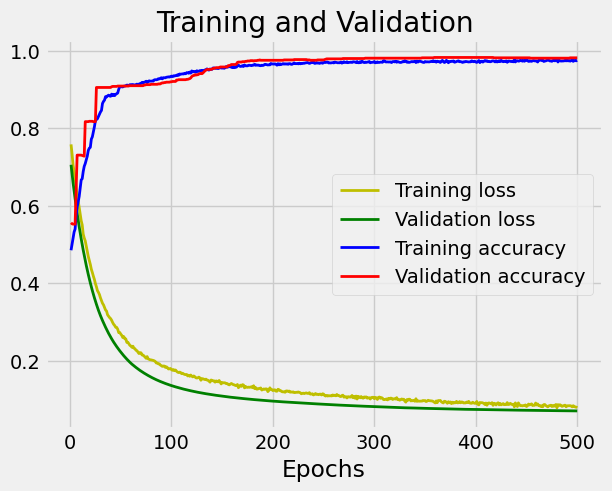

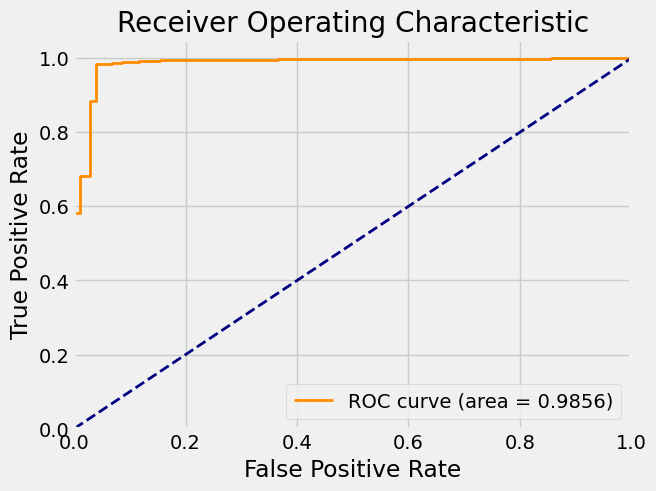

In [67]:
#deep learning model std ci
#run

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Input, concatenate
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from tensorflow.keras.callbacks import ReduceLROnPlateau


accuracy_tr=[]
accuracy_te=[]
loss_tr=[]
loss_te=[]

# 对特征进行标准化处理
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 训练LASSO回归模型，并获取系数
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
coefs = lasso.coef_

# 选择系数不为0的特征
selected_features = X[:, coefs != 0]
X = selected_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
accuracy_scores_tt = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

train_loss=[]
val_loss=[]
train_accuracy=[]
val_accuracy=[]
y_true_test_deep=[]
y_pred_probs_deep=[]

train_acc1=[]
train_loss1=[]
test_acc1=[]
test_loss1=[]

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=84)

for train_idx, test_idx in kfold.split(X, y):
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]

    models = []
    kk=5

        # 重塑数据以匹配 Conv1D 层的期望输入
    X_train = X_train.reshape((-1, X_train.shape[1], 1))
    X_test = X_test.reshape((-1, X_test.shape[1], 1))

    for i in range(kk):
        model = Sequential()
        model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        models.append(model)

    first_layer_train = np.zeros((len(X_train), kk))
    first_layer_test = np.zeros((len(X_test), kk))

    for i, model in enumerate(models):
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.00008)
        
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history1=model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)
        y_pred_train = model.predict(X_train).ravel()
        first_layer_train[:, i] = y_pred_train
        y_pred_test = model.predict(X_test).ravel()
        first_layer_test[:, i] = y_pred_test

    input_layer = Input(shape=(kk,))
    x = Dense(16, activation='relu')(input_layer)
    x=Dropout(0.5)(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    nn_model = Model(inputs=input_layer, outputs=output_layer)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.000055)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
#     nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy','precision','recall', 'f1_score', 'roc_auc'])
    nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history =nn_model.fit(first_layer_train, y_train, epochs=500, batch_size=16, verbose=0,validation_data=(first_layer_test, y_test)
#                           ,callbacks=[reduce_lr]
                         )

    train_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
    train_accuracy.append(history.history['accuracy'])
    val_accuracy.append(history.history['val_accuracy'])

    
    train_acc1.append(np.mean(train_accuracy))
    test_acc1.append(np.mean(val_accuracy))
    train_loss1.append(np.mean(train_loss))
    test_loss1.append(np.mean(val_loss))
    
    
    
    y_pred_tt=nn_model.predict(first_layer_train).ravel()
    y_pred_nn = nn_model.predict(first_layer_test).ravel()
    y_pred_probs_deep.extend(nn_model.predict(first_layer_test))
    y_true_test_deep.extend(y_test)

    y_pred_tt_binary=np.round(y_pred_tt)
    y_pred_nn_binary = np.round(y_pred_nn)
    accuracy_scores_tt.append(accuracy_score(y_train,y_pred_tt_binary))
    
    accuracy_scores.append(accuracy_score(y_test, y_pred_nn_binary))
    precision_scores.append(precision_score(y_test, y_pred_nn_binary))
    recall_scores.append(recall_score(y_test, y_pred_nn_binary))
    f1_scores.append(f1_score(y_test, y_pred_nn_binary))

fold_accuracies_tt=accuracy_scores_tt
fold_accuracies=accuracy_scores
fold_precisions=precision_scores
fold_recalls=recall_scores
fold_f1s=f1_scores

# 计算标准偏差
std_dev_acc = np.std(fold_accuracies)
std_dev_pre = np.std(fold_precisions)
std_dev_rec = np.std(fold_recalls)
std_dev_f1 = np.std(fold_f1s)

# 计算95%置信区间
confidence_interval_acc = stats.t.interval(0.95, len(fold_accuracies)-1, loc=np.mean(fold_accuracies), scale=stats.sem(fold_accuracies))
confidence_interval_pre = stats.t.interval(0.95, len(fold_precisions)-1, loc=np.mean(fold_precisions), scale=stats.sem(fold_precisions))
confidence_interval_rec = stats.t.interval(0.95, len(fold_recalls)-1, loc=np.mean(fold_recalls), scale=stats.sem(fold_recalls))
confidence_interval_f1 = stats.t.interval(0.95, len(fold_f1s)-1, loc=np.mean(fold_f1s), scale=stats.sem(fold_f1s))

overall_accuracy_tt=np.mean(fold_accuracies_tt)
overall_accuracy=np.mean(fold_accuracies)
overall_precision=np.mean(fold_precisions)
overall_recall=np.mean(fold_recalls)
overall_f1=np.mean(fold_f1s)

fpr_deep, tpr_deep, _ = roc_curve(y_true_test_deep, y_pred_probs_deep)
roc_auc_deep = auc(fpr_deep, tpr_deep)

print("accuracy")
print("Fold accuracies:", fold_accuracies)
print("Overall accuracy:", overall_accuracy)
print("Standard deviation:", std_dev_acc)
print("95% confidence interval:", confidence_interval_acc)
print("precision")
print("Fold precisions:", fold_precisions)
print("Overall precision:", overall_precision)
print("Standard deviation:", std_dev_pre)
print("95% confidence interval:", confidence_interval_pre)
print("recall")
print("Fold recalls:", fold_recalls)
print("Overall recall:", overall_recall)
print("Standard deviation:", std_dev_rec)
print("95% confidence interval:", confidence_interval_rec)
print("f1")
print("Fold f1s:", fold_f1s)
print("Overall f1:", overall_f1)
print("Standard deviation:", std_dev_f1)
print("95% confidence interval:", confidence_interval_f1)

mean_train_loss = np.mean(train_loss, axis=0)
mean_val_loss = np.mean(val_loss, axis=0)
std_train_loss = np.std(train_loss, axis=0)
std_val_loss = np.std(val_loss, axis=0)
mean_train_accuracy = np.mean(train_accuracy, axis=0)
mean_val_accuracy = np.mean(val_accuracy, axis=0)
std_train_accuracy= np.std(train_accuracy, axis=0)
std_val_accuracy = np.std(val_accuracy, axis=0)
epochs = range(1, max(len(mean_train_loss), len(mean_val_loss)) + 1)
plt.plot(epochs, mean_train_loss, 'y-',lw=2, label='Training loss')
plt.plot(epochs, mean_val_loss, 'g-', lw=2,label='Validation loss')
plt.plot(epochs, mean_train_accuracy, 'b-', lw=2,label='Training accuracy')
plt.plot(epochs, mean_val_accuracy, 'r-',lw=2, label='Validation accuracy')
# plt.fill_between(epochs, mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.1, color='yellow')
# plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.1, color='green')
# plt.fill_between(epochs, mean_train_accuracy - std_train_accuracy, mean_train_accuracy + std_train_accuracy, alpha=0.1, color='blue')
# plt.fill_between(epochs, mean_val_accuracy - std_val_accuracy, mean_val_accuracy + std_val_accuracy, alpha=0.1, color='red')
plt.title('Training and Validation  ')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend()
plt.show()

# 绘制ROC曲线
plt.figure()
plt.plot(fpr_deep, tpr_deep, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_deep)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [68]:
df_std_ci =df_std_ci.append({'Model':'deep learning model', 'fold_accuracies':fold_accuracies, 'overall_accuracy':overall_accuracy,'std_dev_acc':std_dev_acc,'confidence_interval_acc':confidence_interval_acc,
                          'fold_precisions':fold_precisions,'overall_precision':overall_precision,'std_dev_pre':std_dev_pre,'confidence_interval_pre':confidence_interval_pre,
                          'fold_recalls':fold_recalls,'overall_recall':overall_recall,'std_dev_rec':std_dev_rec,'confidence_interval_rec':confidence_interval_rec,
                          'fold_f1s':fold_f1s,'overall_f1':overall_f1,'std_dev_f1':std_dev_f1,'confidence_interval_f1':confidence_interval_f1},ignore_index=True)


In [50]:
df_std_ci

,Model,fold_accuracies,overall_accuracy,std_dev_acc,confidence_interval_acc,fold_precisions,overall_precision,std_dev_pre,confidence_interval_pre,fold_recalls,overall_recall,std_dev_rec,confidence_interval_rec,fold_f1s,overall_f1,std_dev_f1,confidence_interval_f1
0,SVC,"[0.990909090909091, 0.9818181818181818, 0.9909...",0.985428,0.010982,"(0.9771237606624995, 0.9936852468437559)","[1.0, 0.98, 0.9900990099009901, 1.0, 1.0, 0.99...",0.991952,0.013026,"(0.9820244066986642, 1.0016695807451927)","[0.99, 1.0, 1.0, 0.9702970297029703, 1.0, 0.99...",0.991952,0.009757,"(0.984657864286609, 0.9993730423754857)","[0.9949748743718593, 0.98989898989899, 0.99502...",0.991952,0.006304,"(0.987081800942106, 0.9965890977405999)"
1,SVC+,"[0.990909090909091, 0.990909090909091, 1.0, 0....",0.993636,0.005821,"(0.9892470080734458, 0.9980257191992817)","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.9898989...",0.997990,0.004020,"(0.9949584082148528, 1.0010213897649451)","[0.99, 0.99, 1.0, 0.99, 1.0, 0.98989898989899,...",0.994980,0.005020,"(0.9911942107094444, 0.9987653852501516)","[0.9949748743718593, 0.9949748743718593, 1.0, ...",0.996472,0.003230,"(0.9940363548936549, 0.9989081141572346)"
2,KNN,"[0.9636363636363636, 0.990909090909091, 1.0, 0...",0.985428,0.011675,"(0.9766093768216761, 0.9942163112517186)","[0.9897959183673469, 0.98989898989899, 1.0, 1....",0.995943,0.007085,"(0.9904531189196853, 1.0011380366466256)","[0.97, 1.0, 1.0, 0.9801980198019802, 1.0, 0.98...",0.987928,0.010755,"(0.9798024679835231, 0.9960227392624761)","[0.9797979797979798, 0.9949238578680203, 1.0, ...",0.991919,0.006613,"(0.9868116378294113, 0.9967848847716964)"
3,KNN+,"[0.990909090909091, 0.990909090909091, 0.99090...",0.989074,0.003628,"(0.9863384004233274, 0.9918100566242122)","[1.0, 1.0, 0.9900990099009901, 1.0, 1.0, 1.0, ...",0.998010,0.003980,"(0.995008576741074, 1.0010112252391243)","[0.99, 0.99, 1.0, 0.98, 0.98989898989899, 0.98...",0.989939,0.006357,"(0.9851460560524397, 0.9947327318263484)","[0.9949748743718593, 0.9949748743718593, 0.995...",0.993934,0.002044,"(0.9923929736282096, 0.9954749940669678)"
4,LR,"[0.9818181818181818, 0.9818181818181818, 0.972...",0.989071,0.010641,"(0.9810423600581623, 0.9970894164222383)","[0.99, 0.9897959183673469, 0.9801980198019802,...",0.992972,0.010476,"(0.9849081853499561, 1.0007076235605048)","[0.99, 0.9897959183673469, 0.99, 0.99009900990...",0.994970,0.004965,"(0.9912929304476222, 0.9987812933012833)","[0.99, 0.9897959183673469, 0.9850746268656716,...",0.993970,0.006034,"(0.9893393667253473, 0.9984395364033481)"
5,LR+,"[0.990909090909091, 0.990909090909091, 0.99090...",0.992711,0.003645,"(0.9899621865344369, 0.99545899778583)","[1.0, 0.9900990099009901, 0.9900990099009901, ...",0.998020,0.003960,"(0.995033455890771, 1.001006148069625)","[0.99, 1.0, 1.0, 0.99, 1.0, 0.98989898989899, ...",0.993960,0.004932,"(0.9902405287786317, 0.9976786631405602)","[0.9949748743718593, 0.9950248756218906, 0.995...",0.995969,0.002016,"(0.9944496235171288, 0.9974893627747873)"
6,GNB,"[0.990909090909091, 0.9818181818181818, 1.0, 0...",0.985428,0.012328,"(0.976150364383527, 0.9947420459584246)","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9901960784313726, ...",0.998980,0.002941,"(0.9968018067031951, 1.0012374089830793)","[0.99, 0.9795918367346939, 1.0, 0.980198019801...",0.984909,0.010716,"(0.9771145493224765, 0.9932746851661213)","[0.9949748743718593, 0.9896907216494846, 1.0, ...",0.991895,0.006562,"(0.987090488188919, 0.9969874147026919)"
7,GNB+,"[0.9636363636363636, 1.0, 1.0, 0.9818181818181...",0.988157,0.010008,"(0.9806098796284495, 0.9957037150337691)","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,0.000000,"(nan, nan)","[0.96, 1.0, 1.0, 0.98, 0.98989898989899, 0.989...",0.986929,0.010999,"(0.9786352657292854, 0.9952233201293004)","[0.9795918367346939, 1.0, 1.0, 0.9898989898989...",0.993391,0.005609,"(0.9891609026524046, 0.997620304215822)"
8,DT,"[0.9636363636363636, 0.9818181818181818, 0.981...",0.981785,0.008131,"(0.9756532964549836, 0.98791634491

In [51]:
df_std_ci.to_csv("df_std_ci_4.csv")

In [53]:
fpr_gnb, tpr_gnb, thresholds_gnb = metrics.roc_curve(y_true, y_scores_gnb)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_true, y_scores_lr)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_true, y_scores_svm)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_true, y_scores_knn)
fpr_ada, tpr_ada, thresholds_ada = metrics.roc_curve(y_true, y_scores_ada)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_true, y_scores_rf)
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_true, y_scores_dt)
fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve(y_true, y_scores_xgb)
fpr_lgb, tpr_lgb, thresholds_lgb = metrics.roc_curve(y_true, y_scores_lgb)
fpr_gbdt, tpr_gbdt, thresholds_gbdt = metrics.roc_curve(y_true, y_scores_gbdt)

fpr_early,tpr_early,thresholds_early=metrics.roc_curve(y_true_early,y_scores_early)

fpr_stacking,tpr_stacking,thresholds_stacking=metrics.roc_curve(y_true,y_scores_stacking)
fpr_voting, tpr_voting, thresholds_voting = metrics.roc_curve(y_true, y_scores_proba_voting)

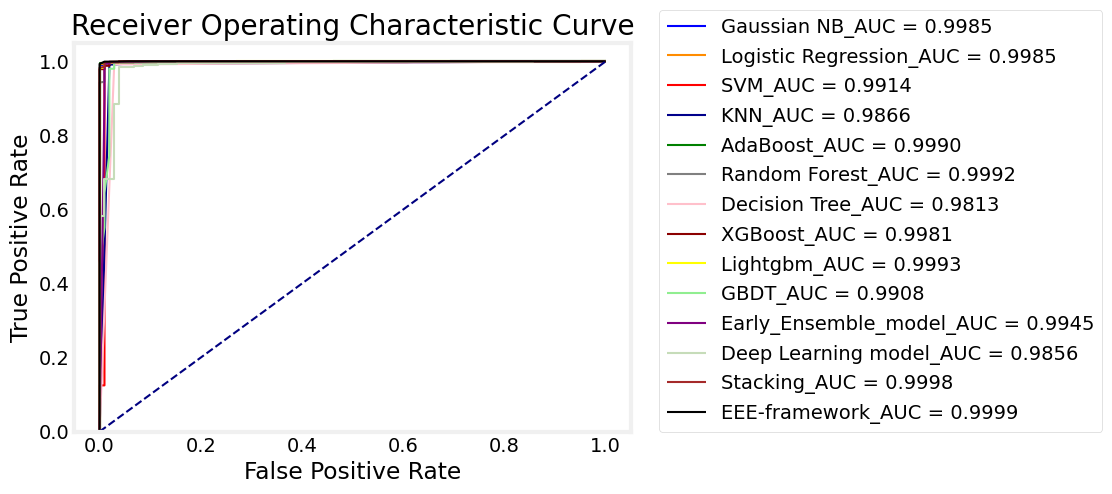

In [70]:
roc_auc_gnb = metrics.auc(fpr_gnb, tpr_gnb)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
roc_auc_ada= metrics.auc(fpr_ada, tpr_ada)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
roc_auc_lgb = metrics.auc(fpr_lgb, tpr_lgb)
roc_auc_gbdt = metrics.auc(fpr_gbdt, tpr_gbdt)

roc_auc_early=metrics.auc(fpr_early,tpr_early)

roc_auc_stacking=metrics.auc(fpr_stacking,tpr_stacking)
roc_auc_voting = metrics.auc(fpr_voting, tpr_voting)
# 绘制AUC曲线
fig=plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
lw =1.5
plt.plot(fpr_gnb, tpr_gnb, color='blue',lw=lw, label='Gaussian NB_AUC = %0.4f' % roc_auc_gnb)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label='Logistic Regression_AUC = %0.4f' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='red',lw=lw, label='SVM_AUC = %0.4f' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color='darkblue',lw=lw, label='KNN_AUC = %0.4f' % roc_auc_knn)
plt.plot(fpr_ada, tpr_ada, color='green',lw=lw, label='AdaBoost_AUC = %0.4f' % roc_auc_ada)
plt.plot(fpr_rf, tpr_rf, color='gray', lw=lw, label='Random Forest_AUC = %0.4f' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='pink',lw=lw, label='Decision Tree_AUC = %0.4f' % roc_auc_dt)
plt.plot(fpr_xgb, tpr_xgb, color='darkred',lw=lw, label='XGBoost_AUC = %0.4f' % roc_auc_xgb)
plt.plot(fpr_lgb, tpr_lgb, color='yellow',lw=lw, label='Lightgbm_AUC = %0.4f' % roc_auc_lgb)
plt.plot(fpr_gbdt, tpr_gbdt, color='lightgreen',lw=lw, label='GBDT_AUC = %0.4f' % roc_auc_gbdt)

plt.plot(fpr_early,tpr_early,color='purple',lw=lw,label='Early_Ensemble_model_AUC = %0.4f' % roc_auc_early)
plt.plot(fpr_deep, tpr_deep, color='#C6DCB9', lw=1.5, label='Deep Learning model_AUC = %0.4f' % roc_auc_deep)

plt.plot(fpr_stacking,tpr_stacking,color='brown',lw=lw, label='Stacking_AUC = %0.4f' % roc_auc_stacking)
plt.plot(fpr_voting, tpr_voting, color='black',lw=lw, label='EEE-framework_AUC = %0.4f' % roc_auc_voting)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc=(1.05,0),facecolor='white')
plt.grid(False)
plt.show()

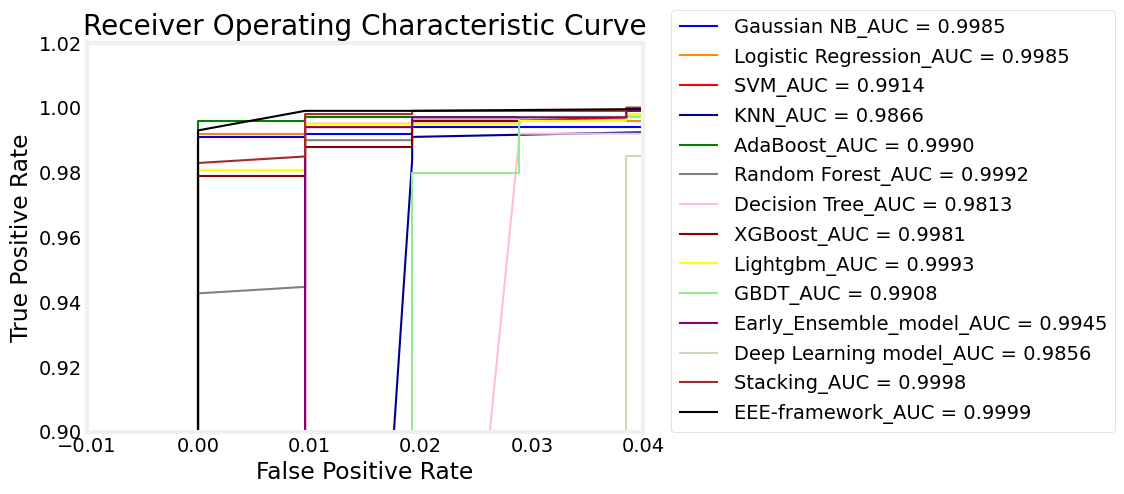

In [79]:
# 绘制AUC曲线
fig=plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
lw =1.5
plt.plot(fpr_gnb, tpr_gnb, color='blue',lw=lw, label='Gaussian NB_AUC = %0.4f' % roc_auc_gnb)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label='Logistic Regression_AUC = %0.4f' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='red',lw=lw, label='SVM_AUC = %0.4f' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color='darkblue',lw=lw, label='KNN_AUC = %0.4f' % roc_auc_knn)
plt.plot(fpr_ada, tpr_ada, color='green',lw=lw, label='AdaBoost_AUC = %0.4f' % roc_auc_ada)
plt.plot(fpr_rf, tpr_rf, color='gray', lw=lw, label='Random Forest_AUC = %0.4f' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='pink',lw=lw, label='Decision Tree_AUC = %0.4f' % roc_auc_dt)
plt.plot(fpr_xgb, tpr_xgb, color='darkred',lw=lw, label='XGBoost_AUC = %0.4f' % roc_auc_xgb)
plt.plot(fpr_lgb, tpr_lgb, color='yellow',lw=lw, label='Lightgbm_AUC = %0.4f' % roc_auc_lgb)
plt.plot(fpr_gbdt, tpr_gbdt, color='lightgreen',lw=lw, label='GBDT_AUC = %0.4f' % roc_auc_gbdt)

plt.plot(fpr_early,tpr_early,color='purple',lw=lw,label='Early_Ensemble_model_AUC = %0.4f' % roc_auc_early)
plt.plot(fpr_deep, tpr_deep, color='#C6DCB9', lw=1.5, label='Deep Learning model_AUC = %0.4f' % roc_auc_deep)

plt.plot(fpr_stacking,tpr_stacking,color='brown',lw=lw, label='Stacking_AUC = %0.4f' % roc_auc_stacking)
plt.plot(fpr_voting, tpr_voting, color='black',lw=lw, label='EEE-framework_AUC = %0.4f' % roc_auc_voting)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 0.04])
plt.ylim([0.9, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc=(1.05,0),facecolor='white')
plt.grid(False)
plt.show()